In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#READING DATASET 
dataset = pd.read_csv('C:/Users/HP/Downloads/newtrial - Sheet 1 - 01_District_wise_crim 2.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [37]:
dataset

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,category
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,118,0,19,1,9,0,0,323,658,0
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,97,0,17,3,4,0,0,328,608,0
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,110,0,9,2,7,0,0,318,644,0
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,105,0,6,3,5,0,6,387,748,0
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,79,0,11,1,5,0,3,362,682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,1811,1732,488,2263,0,2263,2332,1907,...,9033,451,2396,94,13663,5,3789,38177,105419,1
416,WEST BENGAL,2009,2068,2119,931,2336,0,2336,2750,2187,...,11196,506,1942,108,16112,5,3623,38776,113036,1
417,WEST BENGAL,2010,2398,2111,630,2311,0,2311,3345,2764,...,12764,507,2465,163,17796,8,2847,49096,129616,1
418,WEST BENGAL,2011,2109,2242,486,2363,0,2363,4285,3711,...,13094,510,2363,200,19772,0,3249,56614,143197,1


In [3]:
print(X)
print(y)

[['A & N ISLANDS' 2001 13 ... 0 0 323]
 ['A & N ISLANDS' 2002 17 ... 0 0 328]
 ['A & N ISLANDS' 2003 21 ... 0 0 318]
 ...
 ['WEST BENGAL' 2010 2398 ... 8 2847 49096]
 ['WEST BENGAL' 2011 2109 ... 0 3249 56614]
 ['WEST BENGAL' 2012 2252 ... 12 4385 64482]]
[   658    608    644    748    682    676    807    882    941    980
    793    683 130089 143610 156951 158756 157123 173909 175087 179275
 180441 181438 189780 192522   2342   2228   2061   2256   2304   2294
   2286   2374   2362   2439   2286   2420  36877  36346  38195  40675
  42006  43673  45282  53333  55313  61668  66714  77682  88432  94040
  92263 108060  97850 100665 109420 122669 122931 127453 135896 146614
   3397   3806   2806   2889   3133   3126   3643   3931   3555   3373
   3542   3606  38460  37950  38449  41927  43633  45177  45845  51442
  51370  54958  57218  54598    350    349    338    409    434    435
    425    401    442    378    372    318    239    261    269    198
    243    288    260    248    27

In [4]:
#MANAGING MISSING DATA
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 2:31])
X[:, 2:31] = imputer.transform(X[:, 2:31])

print(X)

[['A & N ISLANDS' 2001 13.0 ... 0.0 0.0 323.0]
 ['A & N ISLANDS' 2002 17.0 ... 0.0 0.0 328.0]
 ['A & N ISLANDS' 2003 21.0 ... 0.0 0.0 318.0]
 ...
 ['WEST BENGAL' 2010 2398.0 ... 8.0 2847.0 49096.0]
 ['WEST BENGAL' 2011 2109.0 ... 0.0 3249.0 56614.0]
 ['WEST BENGAL' 2012 2252.0 ... 12.0 4385.0 64482.0]]


In [5]:
#ONE HOT ENCODING ON STATES/UT
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = X

transformer = make_column_transformer(
    (OneHotEncoder(), [0]),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
X = transformed
print(X)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]


In [6]:
print(X)
print(X.shape)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]
(420, 65)


In [7]:
np.shape(X)

(420, 65)

In [8]:
DF = pd.DataFrame(X)
DF.to_csv("ds (1).csv")
print(X[0][0])

1.0


In [9]:
#CLUSTERING TO FIND OPTIMAL NUMBER OF CLUSTERS
y = np.array(y)
Z = y
U = (X[:, 37:])
A = X[:, 36:]
print(X[:, 36:])

[[13.0 0.0 0.0 ... 0.0 0.0 323.0]
 [17.0 3.0 1.0 ... 0.0 0.0 328.0]
 [21.0 4.0 1.0 ... 0.0 0.0 318.0]
 ...
 [2398.0 2111.0 630.0 ... 8.0 2847.0 49096.0]
 [2109.0 2242.0 486.0 ... 0.0 3249.0 56614.0]
 [2252.0 2854.0 522.0 ... 12.0 4385.0 64482.0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

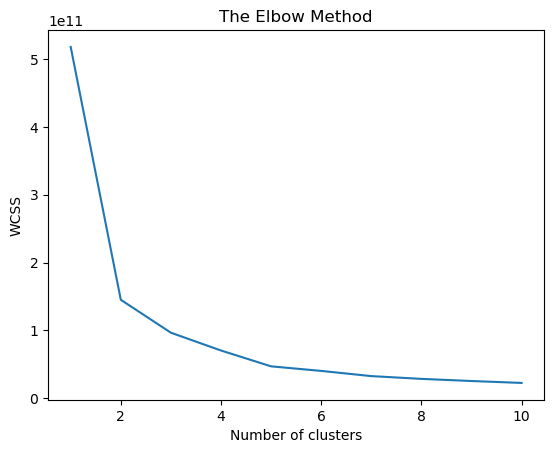

In [10]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
print(X_train)
print(X_train.shape)

[[0.0 0.0 0.0 ... 0.0 57.0 177.0]
 [0.0 0.0 0.0 ... 1.0 10933.0 49834.0]
 [0.0 0.0 0.0 ... 0.0 42.0 54106.0]
 ...
 [0.0 0.0 0.0 ... 0.0 441.0 2227.0]
 [0.0 0.0 0.0 ... 0.0 6008.0 100513.0]
 [0.0 0.0 0.0 ... 0.0 1957.0 8575.0]]
(336, 65)


In [15]:
print(X_test)

[[0.0 0.0 0.0 ... 0.0 203.0 1241.0]
 [0.0 0.0 0.0 ... 0.0 610.0 7020.0]
 [0.0 1.0 0.0 ... 0.0 11489.0 43722.0]
 ...
 [0.0 0.0 0.0 ... 0.0 12.0 161.0]
 [0.0 0.0 0.0 ... 0.0 2226.0 9316.0]
 [0.0 0.0 0.0 ... 2.0 2907.0 23091.0]]


In [16]:
print(y_train)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 0 1 0]


In [17]:
print(y_test)

[0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0]


In [18]:
print(X)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]


In [20]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 37:] = sc.fit_transform(X_train[:, 37:])
X_test[:, 37:] = sc.transform(X_test[:, 37:])

In [21]:
print(X_train)

[[0.0 0.0 0.0 ... -0.24230949037789695 -0.6355423218652001
  -0.8087924772174302]
 [0.0 0.0 0.0 ... -0.13885842460029418 2.4298134415889105
  0.9351913193329178]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.6397700100273748
  1.0852265364999454]
 ...
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.5273135049135287
  -0.7367952405150878]
 [0.0 0.0 0.0 ... -0.24230949037789695 1.0417224950082289
  2.715068372424629]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.10003515465640915
  -0.5138496509607127]]


In [22]:
print(X_test)

[[0.0 0.0 0.0 ... -0.24230949037789695 -0.5943928237533667
  -0.7714241553387511]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.4796815516196941
  -0.5684621890446845]
 [0.0 1.0 0.0 ... -0.24230949037789695 2.5865197494668513
  0.7205341921501294]
 ...
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.6482253863517241
  -0.8093544068697411]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.02421861361474348
  -0.4878252839380611]
 [0.0 0.0 0.0 ... -0.035407358822691415 0.16771842894798633
  -0.0040389739015900565]]


In [23]:
#ANALYSIS OF CRIME RATE
dataset.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,420.000000,420.000000,420.000000,420.00000,420.00000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,958.435714,838.040476,106.22381,569.37381,0.061905,569.311905,849.659524,628.350000,221.309524,...,270.723810,8028.276190,217.147619,1078.940476,295.366667,2083.811905,2.123810,2385.390476,23340.069048,57001.557143
std,3.456169,1213.687365,1149.623253,253.86659,694.97765,0.392016,694.930776,1217.488114,966.279578,342.334028,...,357.828308,11603.262625,396.788651,1499.475571,698.715736,3236.534832,8.914278,3665.454858,29320.629427,66193.547043
min,2001.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,31.000000
25%,2003.750000,46.000000,32.000000,4.00000,29.00000,0.000000,29.000000,37.500000,15.500000,11.750000,...,18.000000,154.750000,1.000000,38.750000,2.000000,11.750000,0.000000,37.000000,693.750000,2408.500000
50%,2006.500000,463.500000,434.000000,29.00000,298.50000,0.000000,298.500000,295.500000,228.000000,81.500000,...,110.500000,1834.500000,45.000000,374.000000,28.000000,663.500000,0.000000,463.500000,10414.500000,30116.500000
75%,2009.250000,1461.000000,1302.250000,92.25000,936.00000,0.000000,935.250000,1195.500000,894.750000,287.000000,...,413.000000,11239.500000,273.500000,1662.000000,185.000000,2764.000000,0.000000,3025.000000,41774.750000,109178.500000
max,2012.000000,7601.000000,7964.000000,1616.00000,3425.00000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


             STATE/UT  TOTAL IPC CRIMES
0       A & N ISLANDS              9102
1      ANDHRA PRADESH           2018981
2   ARUNACHAL PRADESH             27652
3               ASSAM            597764
4               BIHAR           1346293
5          CHANDIGARH             40807
6        CHHATTISGARH            561027
7        D & N HAVELI              4651
8         DAMAN & DIU              2948
9            DELHI UT            633174
10                GOA             32051
11            GUJARAT           1385775
12            HARYANA            595303
13   HIMACHAL PRADESH            154948
14    JAMMU & KASHMIR            259155
15          JHARKHAND            422351
16          KARNATAKA           1481063
17             KERALA           1437459
18        LAKSHADWEEP               743
19     MADHYA PRADESH           2413770
20        MAHARASHTRA           2273436
21            MANIPUR             35072
22          MEGHALAYA             25249
23            MIZORAM             26146


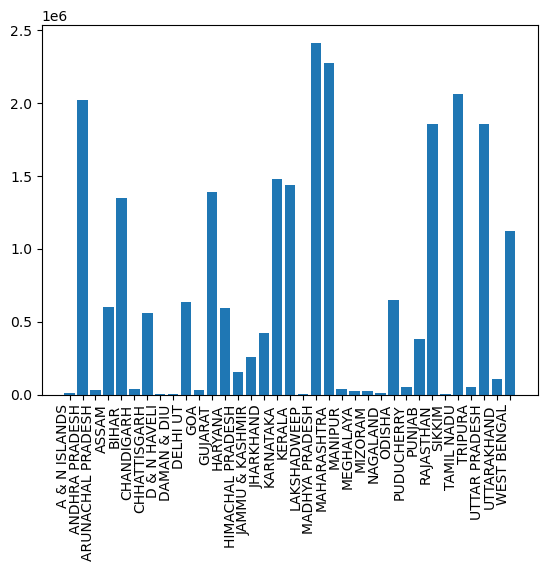

In [24]:
#SATE VS TOTAL CRIME OVER 10 YEARS
import matplotlib.pyplot as plt
import seaborn as sns

df_sum_by_state = dataset.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['TOTAL IPC CRIMES']
print(df_sum_by_state)
fig, ax = plt.subplots()
plt.xticks(rotation=90, ha='right')
ax.bar(states, sum)
plt.show()

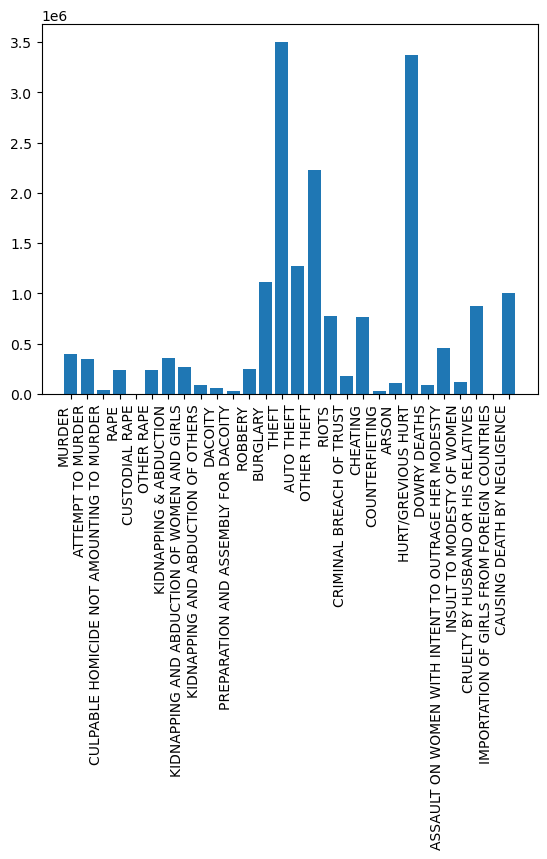

In [25]:
#TYPE OF CRIME V/S RATE OF THAT CRIME
import matplotlib.pyplot as plt
import seaborn as sns


sum_column = dataset.sum(axis=0)
sum_col = sum_column
f = np.array(sum_col[2:30])
crimes = dataset.columns.values[2:30]

fig, ax = plt.subplots()
plt.xticks(rotation=90, ha='right')
ax.bar(crimes, f)

plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]


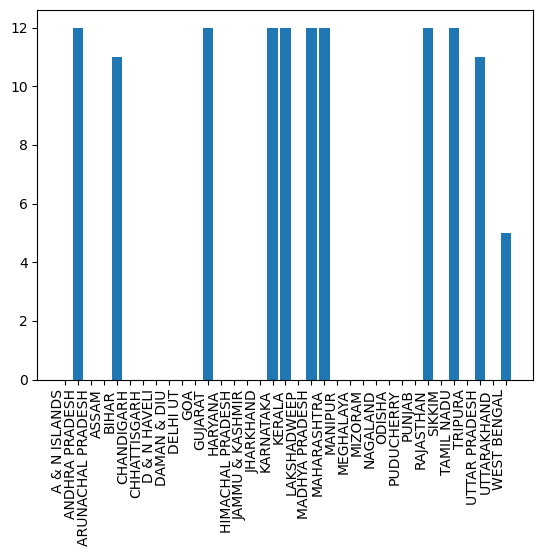

In [35]:
#RESULTS
#CLASSIFYING STATES AS SAFE/UNSAFE
#STATE WITH HIGHER BARS ARE UNSAFE
print(y_kmeans)
dataset['category'] = y_kmeans
df_sum_by_state = dataset.groupby('STATE/UT')['category'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['category']
#print(df_sum_by_state)
fig, ax = plt.subplots()
plt.xticks(rotation=90, ha='right')
ax.bar(states, sum)
# Display the resulting DataFrame
plt.show()
#print(dataset.head(10))

A & N ISLANDS  : 



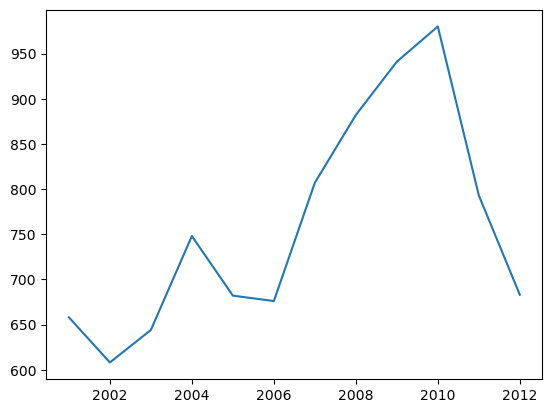



ANDHRA PRADESH  : 



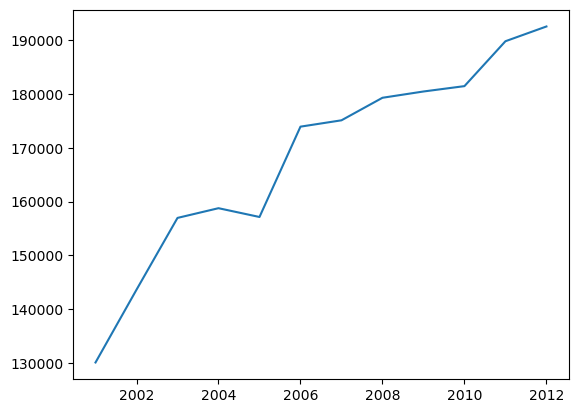



ARUNACHAL PRADESH  : 



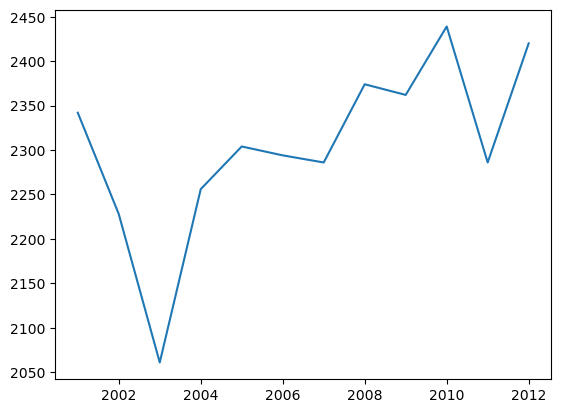



ASSAM  : 



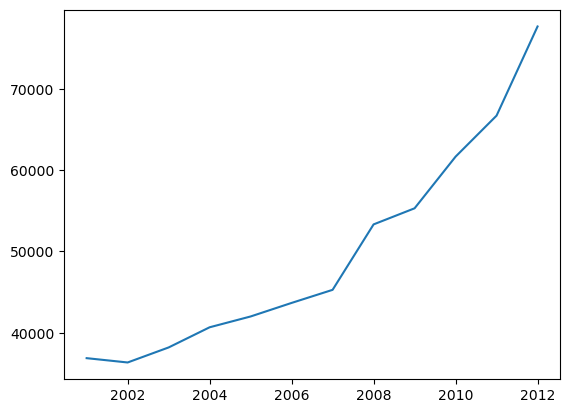



BIHAR  : 



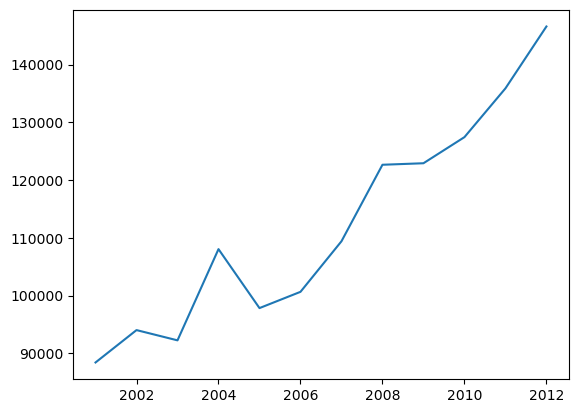



CHANDIGARH  : 



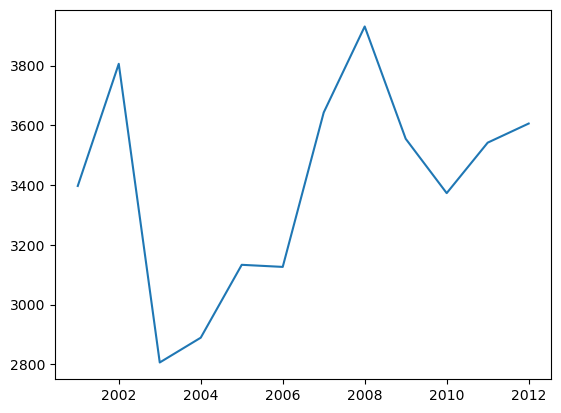



CHHATTISGARH  : 



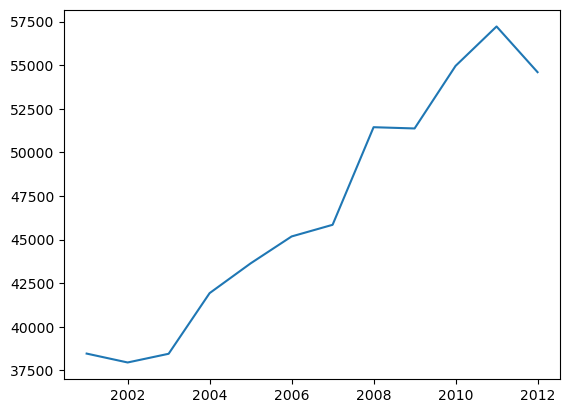



D & N HAVELI  : 



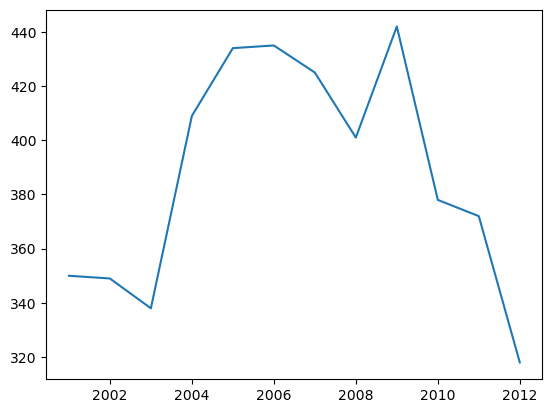



DAMAN & DIU  : 



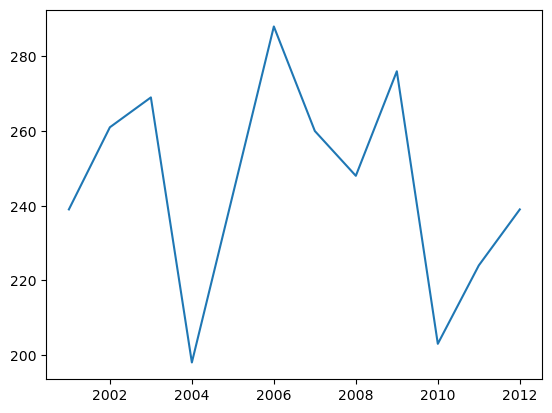



DELHI UT  : 



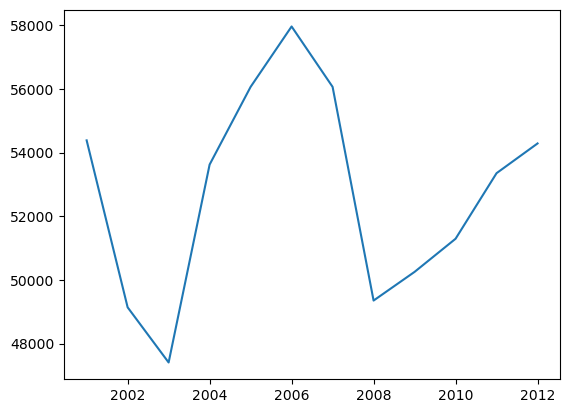



GOA  : 



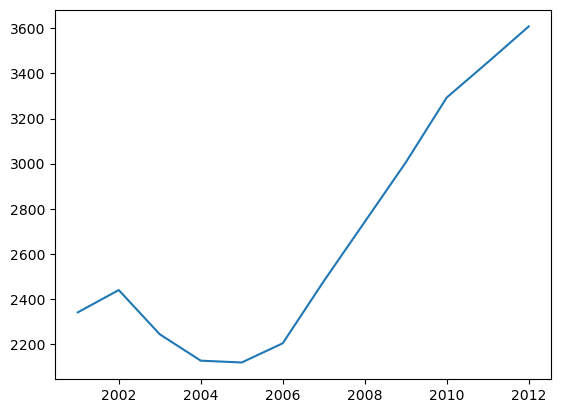



GUJARAT  : 



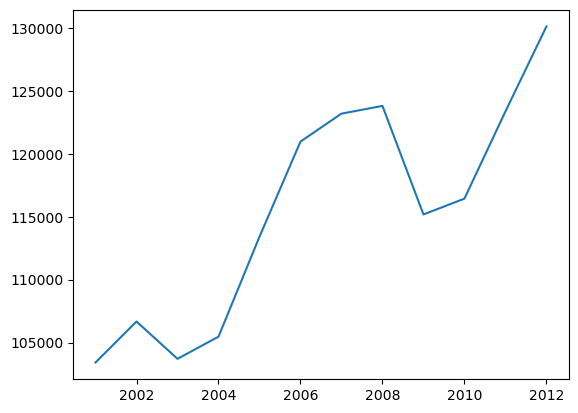



HARYANA  : 



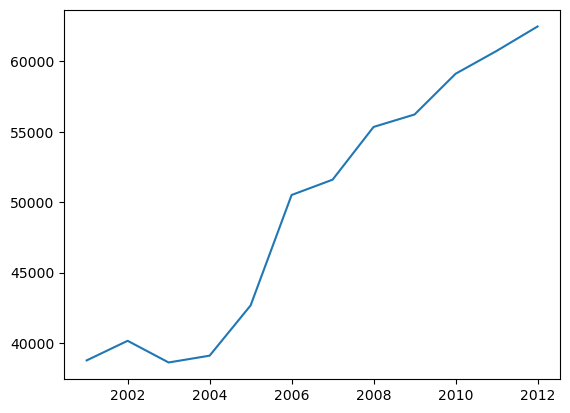



HIMACHAL PRADESH  : 



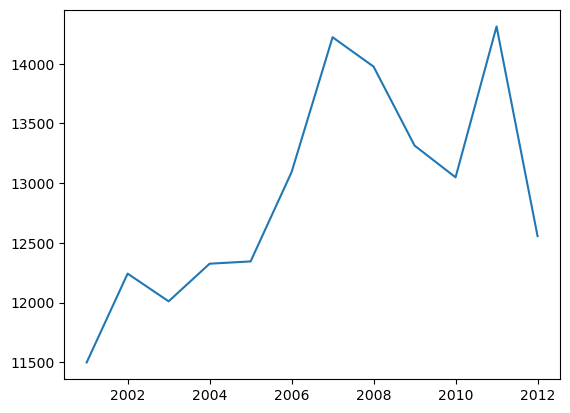



JAMMU & KASHMIR  : 



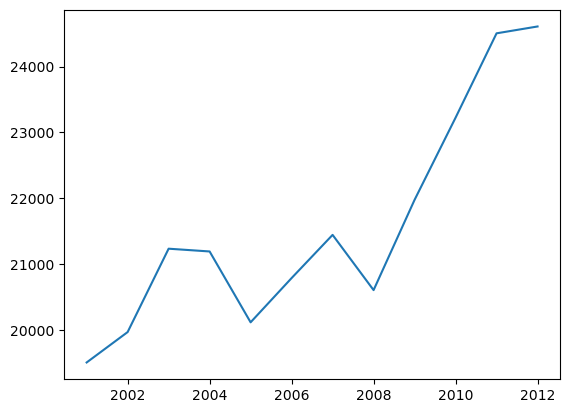



JHARKHAND  : 



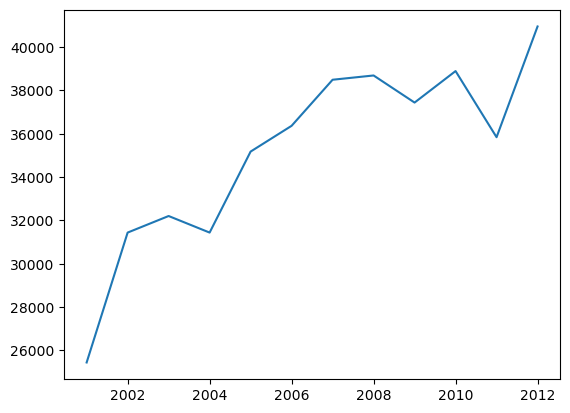



KARNATAKA  : 



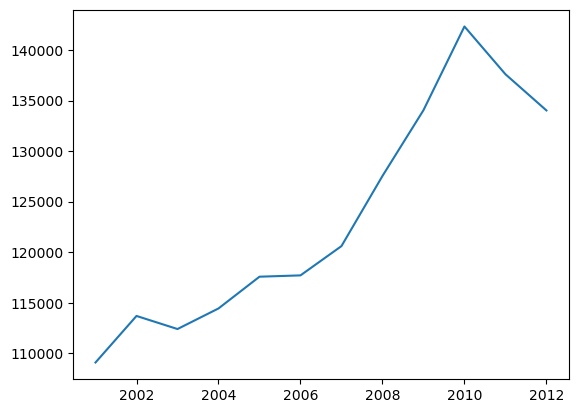



KERALA  : 



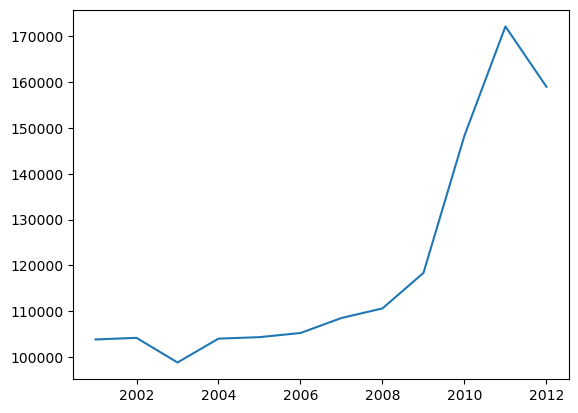



LAKSHADWEEP  : 



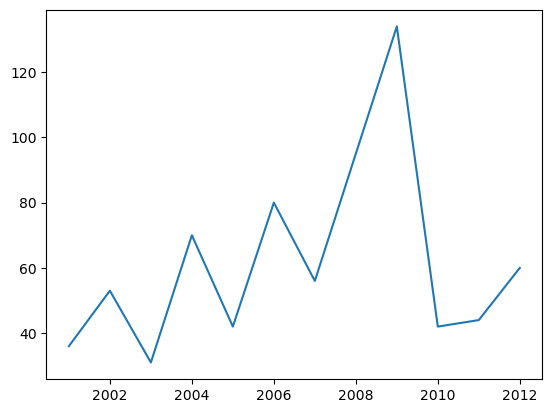



MADHYA PRADESH  : 



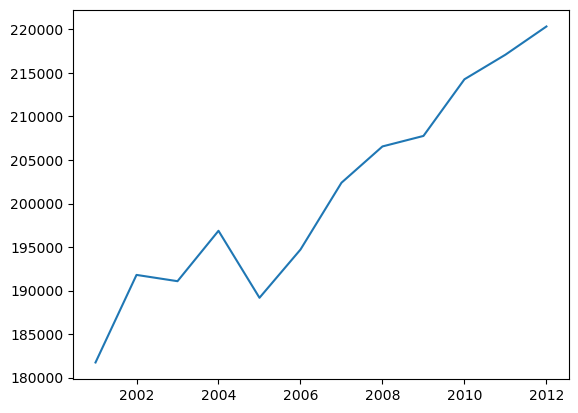



MAHARASHTRA  : 



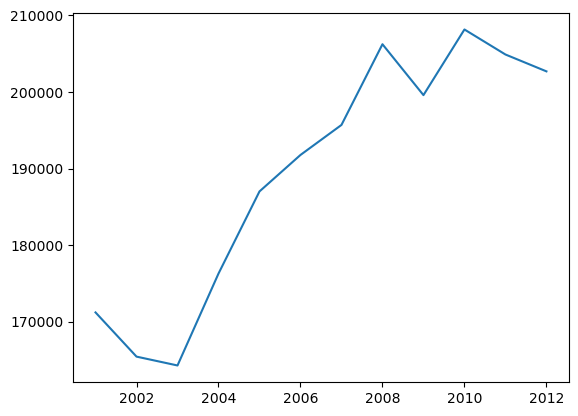



MANIPUR  : 



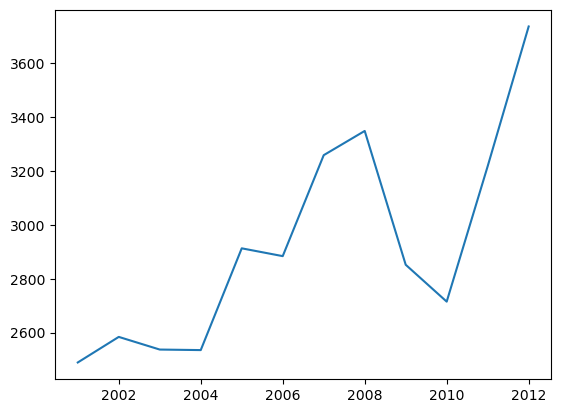



MEGHALAYA  : 



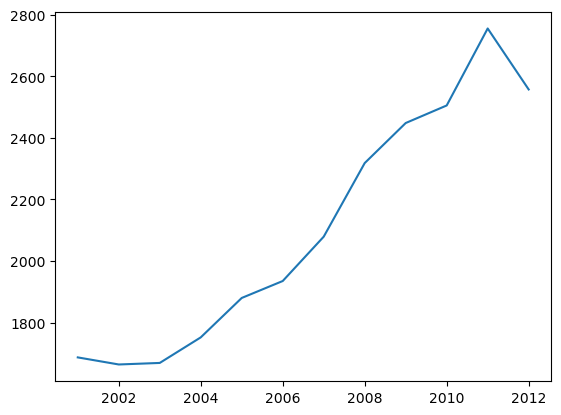



MIZORAM  : 



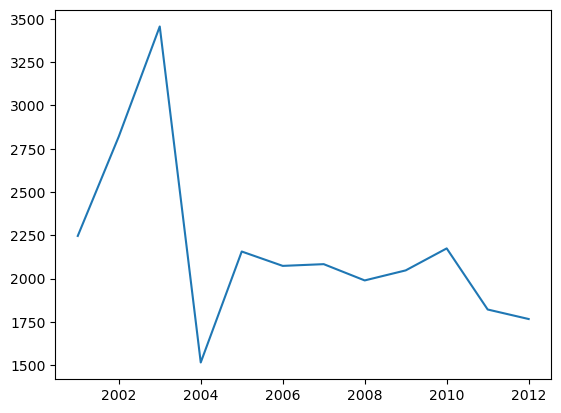



NAGALAND  : 



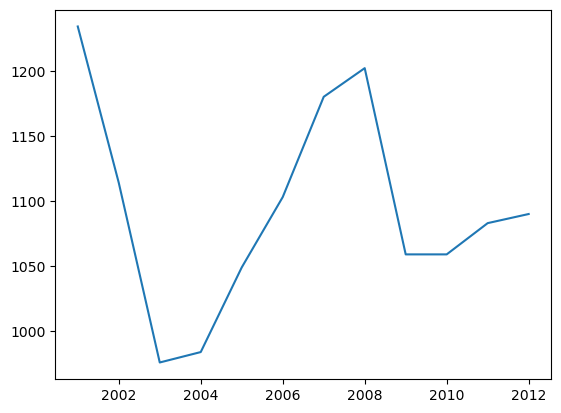



ODISHA  : 



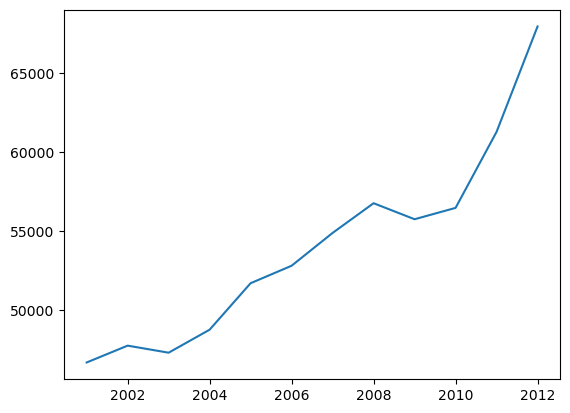



PUDUCHERRY  : 



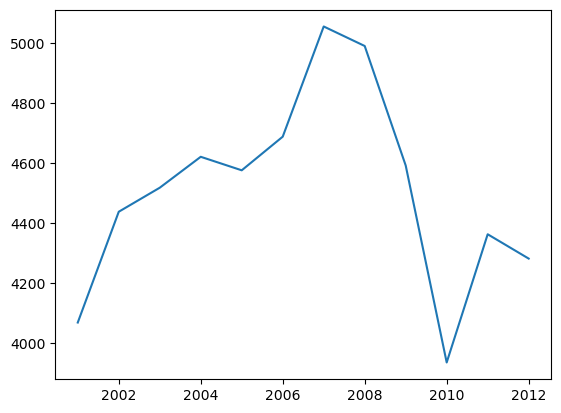



PUNJAB  : 



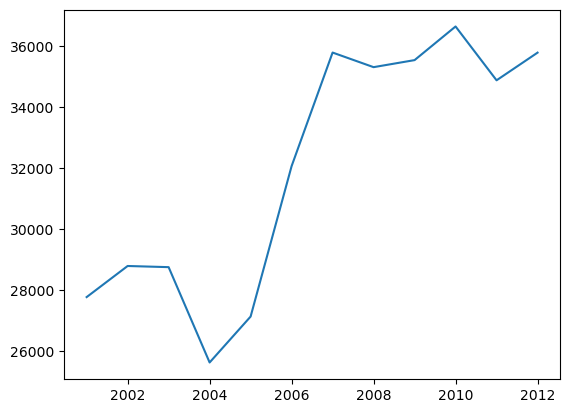



RAJASTHAN  : 



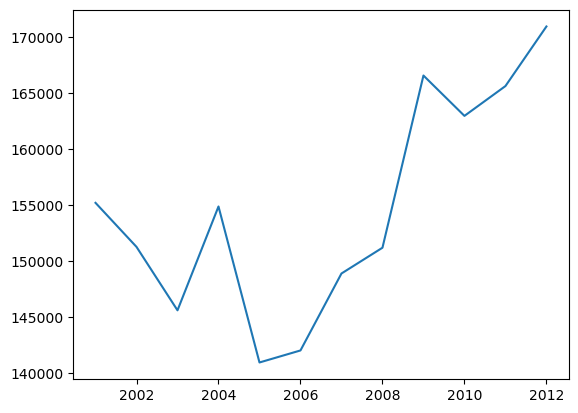



SIKKIM  : 



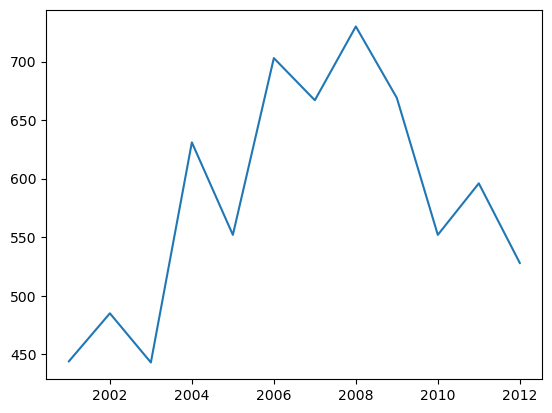



TAMIL NADU  : 



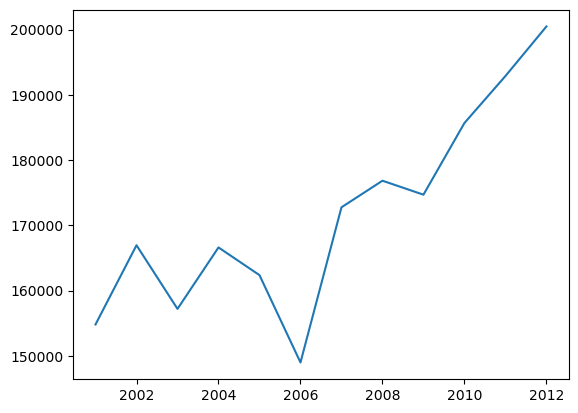



TRIPURA  : 



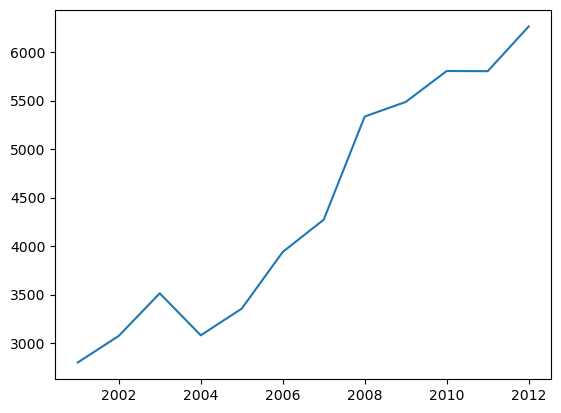



UTTAR PRADESH  : 



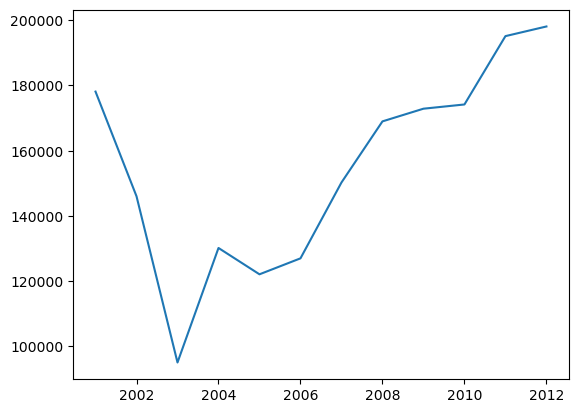



UTTARAKHAND  : 



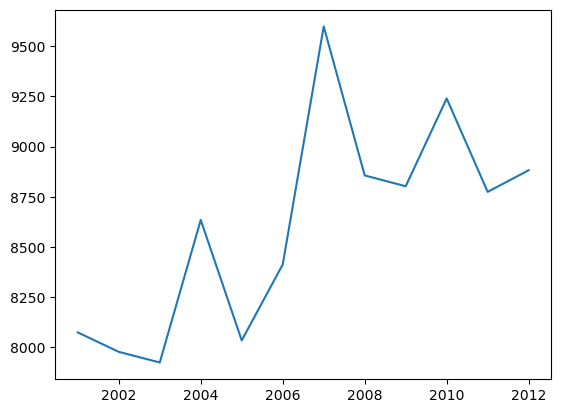



WEST BENGAL  : 



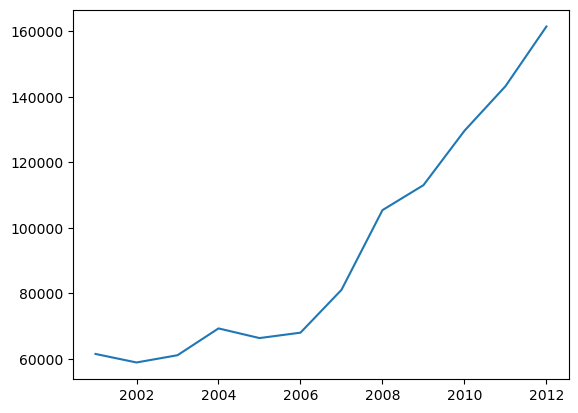

In [36]:
import seaborn as sns
import numpy as np
import pandas as pd

states = (dataset.iloc[:, 0].unique())
for state in states:
  print( state, " : \n")
  data = dataset[dataset['STATE/UT'] == state]
  grouped = data.groupby('YEAR').agg('TOTAL IPC CRIMES').sum()
  arr = np.array(grouped)
  year = (dataset.iloc[:, 1].unique())
  plt.figure()
  plt.plot(year, arr)
  plt.show()
  print("\n")

In [40]:
dataset

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,category
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,118,0,19,1,9,0,0,323,658,0
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,97,0,17,3,4,0,0,328,608,0
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,110,0,9,2,7,0,0,318,644,0
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,105,0,6,3,5,0,6,387,748,0
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,79,0,11,1,5,0,3,362,682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,WEST BENGAL,2008,1811,1732,488,2263,0,2263,2332,1907,...,9033,451,2396,94,13663,5,3789,38177,105419,1
416,WEST BENGAL,2009,2068,2119,931,2336,0,2336,2750,2187,...,11196,506,1942,108,16112,5,3623,38776,113036,1
417,WEST BENGAL,2010,2398,2111,630,2311,0,2311,3345,2764,...,12764,507,2465,163,17796,8,2847,49096,129616,1
418,WEST BENGAL,2011,2109,2242,486,2363,0,2363,4285,3711,...,13094,510,2363,200,19772,0,3249,56614,143197,1


In [44]:
dataset['STATE/UT'].value_counts()

STATE/UT
A & N ISLANDS        12
PUDUCHERRY           12
MAHARASHTRA          12
MANIPUR              12
MEGHALAYA            12
MIZORAM              12
NAGALAND             12
ODISHA               12
PUNJAB               12
LAKSHADWEEP          12
RAJASTHAN            12
SIKKIM               12
TAMIL NADU           12
TRIPURA              12
UTTAR PRADESH        12
UTTARAKHAND          12
MADHYA PRADESH       12
KERALA               12
ANDHRA PRADESH       12
DAMAN & DIU          12
ARUNACHAL PRADESH    12
ASSAM                12
BIHAR                12
CHANDIGARH           12
CHHATTISGARH         12
D & N HAVELI         12
DELHI UT             12
KARNATAKA            12
GOA                  12
GUJARAT              12
HARYANA              12
HIMACHAL PRADESH     12
JAMMU & KASHMIR      12
JHARKHAND            12
WEST BENGAL          12
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
encoder = LabelEncoder()

In [48]:
dataset['STATE/UT'] = encoder.fit_transform(dataset['STATE/UT'])

In [49]:
dataset

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,category
0,0,2001,13,0,0,3,0,3,2,2,...,118,0,19,1,9,0,0,323,658,0
1,0,2002,17,3,1,2,0,2,2,1,...,97,0,17,3,4,0,0,328,608,0
2,0,2003,21,4,1,2,0,2,2,2,...,110,0,9,2,7,0,0,318,644,0
3,0,2004,15,1,2,10,0,10,3,3,...,105,0,6,3,5,0,6,387,748,0
4,0,2005,14,3,3,4,0,4,2,1,...,79,0,11,1,5,0,3,362,682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,34,2008,1811,1732,488,2263,0,2263,2332,1907,...,9033,451,2396,94,13663,5,3789,38177,105419,1
416,34,2009,2068,2119,931,2336,0,2336,2750,2187,...,11196,506,1942,108,16112,5,3623,38776,113036,1
417,34,2010,2398,2111,630,2311,0,2311,3345,2764,...,12764,507,2465,163,17796,8,2847,49096,129616,1
418,34,2011,2109,2242,486,2363,0,2363,4285,3711,...,13094,510,2363,200,19772,0,3249,56614,143197,1


<Axes: >

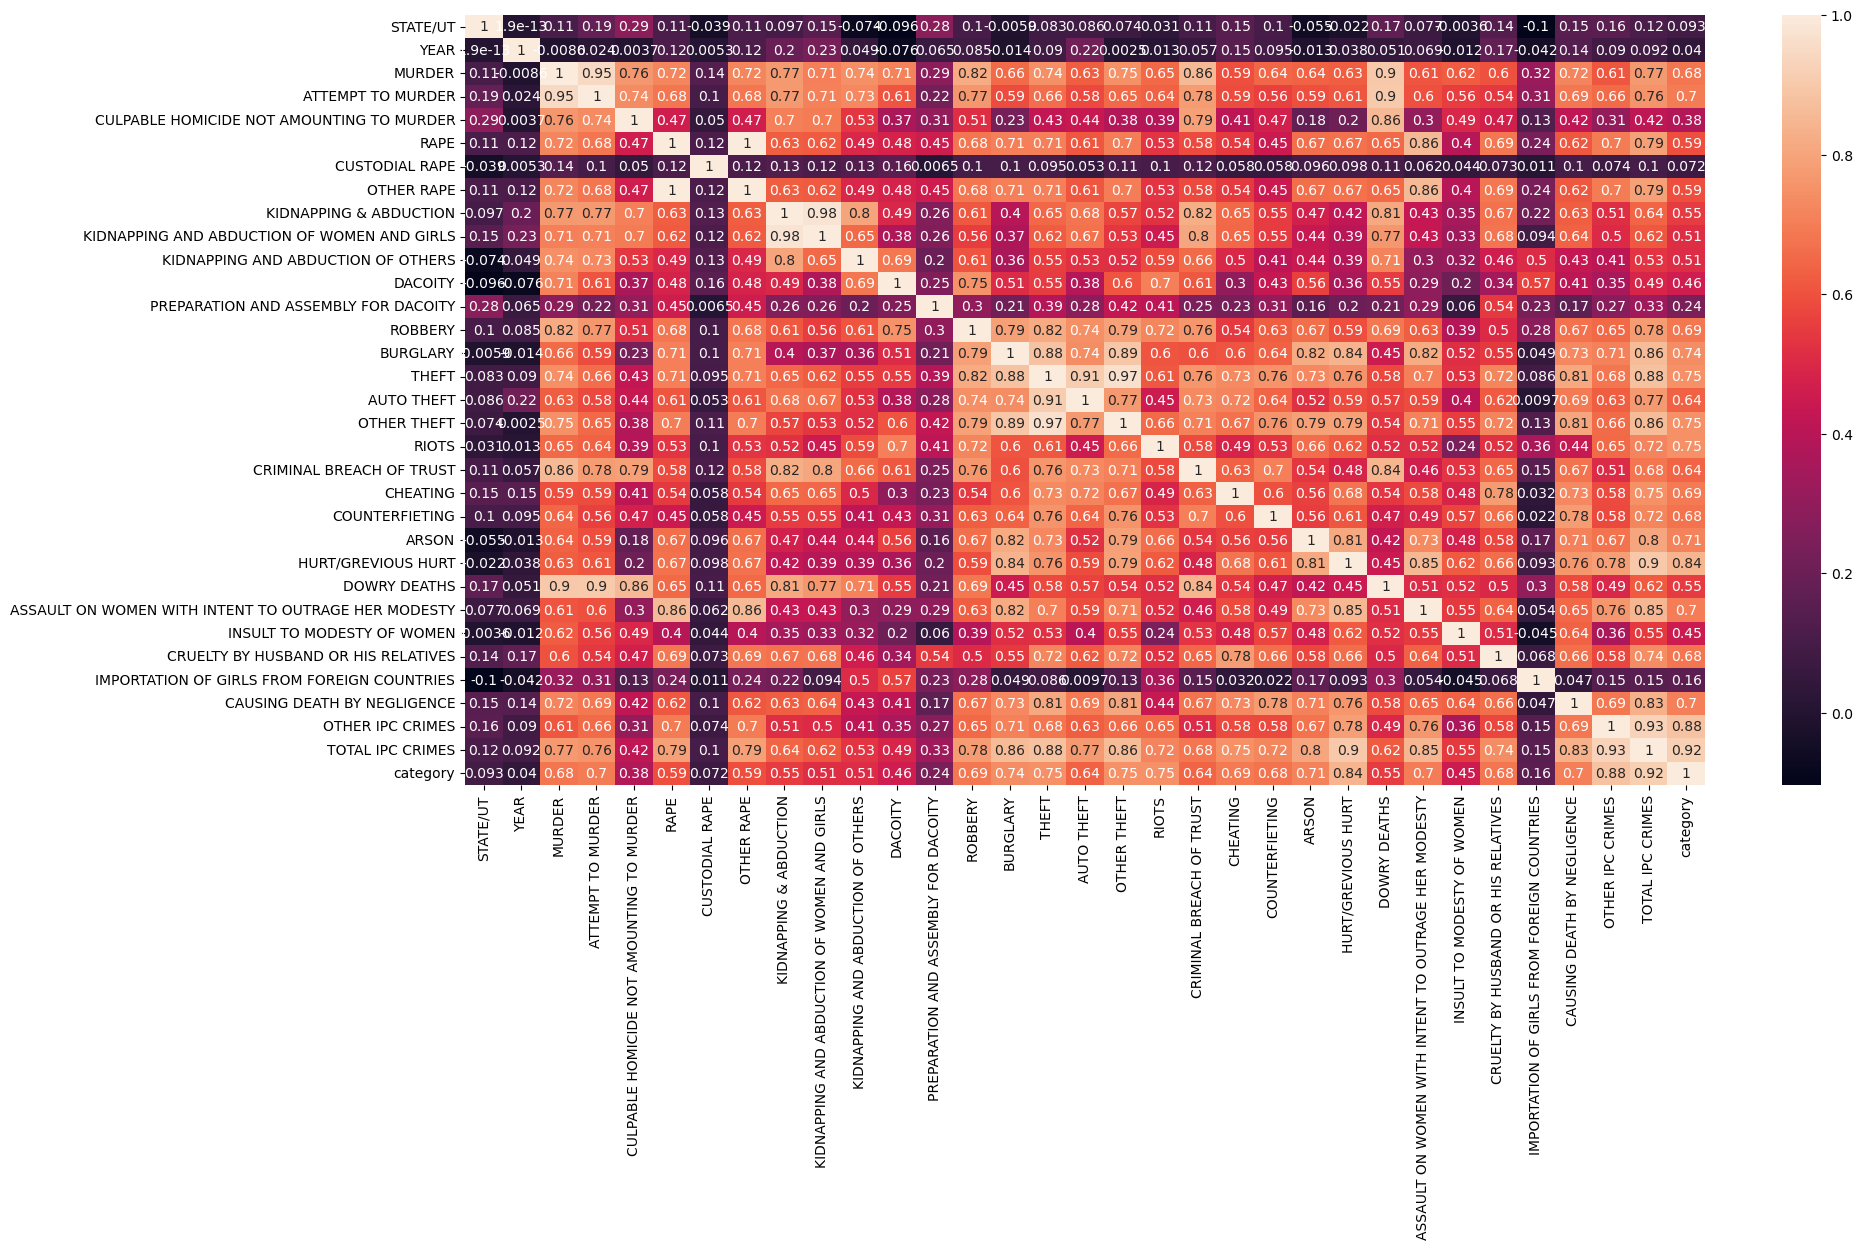

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)

In [56]:
dataset.drop(['ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','BURGLARY','OTHER THEFT','CHEATING','ARSON','HURT/GREVIOUS HURT','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','OTHER IPC CRIMES'], axis=1, inplace=True)

In [57]:
dataset

,STATE/UT,YEAR,MURDER,RAPE,ROBBERY,THEFT,AUTO THEFT,RIOTS,CRIMINAL BREACH OF TRUST,COUNTERFIETING,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,CAUSING DEATH BY NEGLIGENCE,TOTAL IPC CRIMES,category
0,0,2001,13,3,4,65,4,13,10,2,0,9,0,658,0
1,0,2002,17,2,7,49,2,11,4,0,0,4,0,608,0
2,0,2003,21,2,7,60,3,19,3,0,0,7,0,644,0
3,0,2004,15,10,3,103,9,9,0,0,0,5,6,748,0
4,0,2005,14,4,4,92,6,4,8,0,0,5,3,682,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,34,2008,1811,2263,613,17334,2593,5425,876,148,451,13663,3789,105419,1
416,34,2009,2068,2336,751,17133,3709,6700,918,153,506,16112,3623,113036,1
417,34,2010,2398,2311,798,19389,4123,6809,1011,214,507,17796,2847,129616,1
418,34,2011,2109,2363,760,21446,4642,6019,1264,207,510,19772,3249,143197,1


In [58]:
x = dataset.drop('TOTAL IPC CRIMES', axis=1)
y = dataset[['TOTAL IPC CRIMES']]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [91]:
x_train.shape

(336, 14)

## Linear Regression 

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
linear = LinearRegression()

In [63]:
linear.fit(x_train,y_train)

LinearRegression()

In [64]:
predict = linear.predict(x_test)

In [65]:
from sklearn.metrics import r2_score

In [66]:
r2_score(y_test, predict)

0.9659510133187732

## Random forest Regression

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [94]:
regressor.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [95]:
y_pred = classifier.predict(X_test)

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2_score(y_test, predict)

0.9659510133187732

In [98]:
import pickle

In [99]:
with open(r'C:\Users\HP\OneDrive\Desktop\Crime Prediction\model_final.pkl', 'wb') as file:
    pickle.dump(regressor, file)

## Decision Tree Regression 

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
regressor = DecisionTreeRegressor(random_state = 0)

In [83]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [84]:
y_pred = classifier.predict(X_test)

In [85]:
from sklearn.metrics import r2_score

In [86]:
r2_score(y_test, predict)

0.9659510133187732